In [1]:
import rasterio as rio
from rasterio import plot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We're reading in the raw band paths below. For some reason, I had trouble reading the seperate band paths after setting an image path to the bands. 

In [2]:
band2 = rio.open(r'C:/Users/Matt/Documents/SatelliteImagery/Landsat/LC08_L1TP_015033_20190812_20190820_01_T1.tar/IMGDATA/LC08_L1TP_015033_20190812_20190820_01_T1/LC08_L1TP_015033_20190812_20190820_01_T1_B2.TIF')
band3 = rio.open(r'C:/Users/Matt/Documents/SatelliteImagery/Landsat/LC08_L1TP_015033_20190812_20190820_01_T1.tar/IMGDATA/LC08_L1TP_015033_20190812_20190820_01_T1/LC08_L1TP_015033_20190812_20190820_01_T1_B3.TIF')
band4 = rio.open(r'C:/Users/Matt/Documents/SatelliteImagery/Landsat/LC08_L1TP_015033_20190812_20190820_01_T1.tar/IMGDATA/LC08_L1TP_015033_20190812_20190820_01_T1/LC08_L1TP_015033_20190812_20190820_01_T1_B4.TIF')

In [3]:
band2.height, band2.width

(7951, 7821)

Below, we see the scene is saved as a 16 bit image. This means each pixel has the possibility to take on brightness values between 0 - 255. This is directly correlated to the image's radiometric resoution, which is one of four resolutions of a remotely sensed image.

In [4]:
band2.dtypes[0]

'uint16'

It is extremely important when working with any spatial data, to check the coordinate reference system. The line below shows the Landsat image is using WGS 84 in UTM zone 18 North. This information is publically cataloged at epsg.io/32618. This website shows many important attributes of each CRS including the spatial unit of measure, geodetic CRS, datum, ellipsoid, and more.

In [5]:
band2.crs

CRS.from_epsg(32618)

Below, we are checking the transform parameters of the image. These transform parameters can be helpful when an matrix needs to be tranformed into a raster image.

In [6]:
band2.transform

Affine(30.0, 0.0, 221985.0,
       0.0, -30.0, 4426515.0)

Plotting band 2 below.

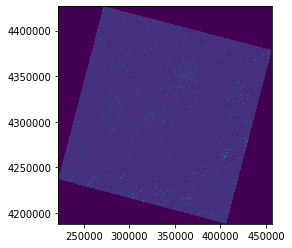

In [7]:
plot.show(band2)

In [12]:
#band2.dtypes.can_cast_dtype(band2, 'float')

In [9]:
band2.read(1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [10]:
blue = band2.read(1).astype('float64')
green = band3.read(1).astype('float64')
red = band4.read(1).astype('float64')

In [10]:
trueColor = rio.open(r'C:\Users\Matt\Documents\SatelliteImagery\Landsat\Output\LandsatTrueColor_2.tif',
                    'w', 
                    driver='Gtiff',
                    width = band2.width, 
                    height = band2.height,
                    count = 3,
                    crs = band2.crs,
                    transform = band2.transform,
                    dtype = band2.dtypes[0]
                    )
trueColor.write(band2.read(1),3) #Blue
trueColor.write(band3.read(1),2) #Green
trueColor.write(band4.read(1),1) #Red
trueColor.close()

In [11]:
#src = rio.open(r'C:\Users\Matt\Documents\SatelliteImagery\Landsat\Output\LandsatTrueColor_2.tif', counts=3)
#plot.show(src)

In [ ]:
red = band4.read(1).astype('float64')
nir = band5.read(1).astype('float64')

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
plot.show(band2, ax=ax1, cmap='Blues')
plot.show(band3, ax=ax2, cmap='Greens')
plot.show(band4, ax=ax3, cmap='Reds')

In [ ]:
blue = band2.read()
green = band3.read()
red = band4.read()
trueColor = blue + green + red
plot.show(trueColor)